In [38]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from datetime import datetime


In [39]:
consumer_key = "9qo7SyzltMwxbYdPnPDP6F7sR"
consumer_secret = "GbSdn6YPxiWPiA19ps9ev7BNhKBxT51DClvFVjzeEGLenQnRiZ"
access_token = "930207274471129089-J9VsCX8h2LLp8xcLTorQVyMCDMfihFF"
access_token_secret = "h7hZ3VavSGHCbNnioJLi46xRjmyGDsCB6Cmvaa8Gtgeh0"

In [40]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [32]:
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYT")
sentiments = []

# Loop through all target users
for target in target_users:


    counter = 0
    
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    public_tweets = api.user_timeline(target, count=100)

    # Loop through each tweet
    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiments for each tweet to an array
        sentiments.append({"Tweet": tweet["text"],"News Org": target,"Tweets Ago": counter,"Date": tweet["created_at"], "Compound": compound,"Positive": pos,"Negative": neu,"Neutral": neg})

        
        counter = counter + 1


In [33]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)

# Configure dataframe column order and display
sentiments_pd = sentiments_pd[['News Org', 'Tweets Ago','Date','Tweet','Compound','Positive','Neutral','Negative']]


In [34]:
#Convert DF to csv
sentiments_pd.to_csv("news_twitter_sentiments.csv", encoding="utf-8", index=False)

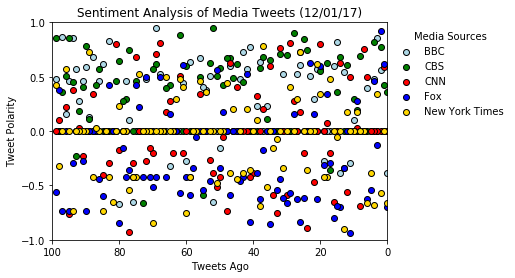

In [43]:
# Create dictionary to hold news org color mapping for following plots 
orgs_colors_dict = {'@BBC':'lightblue','@CBS': 'green','@CNN': 'red','@FoxNews': 'blue','@NYT': 'gold'}

# Create new org scatterplots using the dataframe's "Tweets Ago" and "Compound" columns as x and y respectively
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@BBC")["Compound"],
                  facecolors=orgs_colors_dict['@BBC'], edgecolors='black', label="BBC")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CBS")["Compound"],
                  facecolors=orgs_colors_dict['@CBS'], edgecolors='black', label="CBS")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@CNN")["Compound"],
                  facecolors=orgs_colors_dict['@CNN'], edgecolors='black', label="CNN")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@FoxNews")["Compound"],
                  facecolors=orgs_colors_dict['@FoxNews'], edgecolors='black', label="Fox")
plt.scatter(sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Tweets Ago"],
                sentiments_pd.groupby(["News Org"]).get_group("@NYT")["Compound"],
                  facecolors=orgs_colors_dict['@NYT'], edgecolors='black', label="New York Times")

# Txt properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f'Sentiment Analysis of Media Tweets ({now})')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Configure axes
plt.xlim(100, 0)
plt.ylim(-1.0, 1.0)
yticks = [-1.0, -0.5, 0.0, 0.5, 1.0]
plt.yticks(yticks)

# Add Media Sources to legend and place next to chart
plt.legend(title="Media Sources", bbox_to_anchor=(1, 1), frameon=False)

# Save graph as .png image and display
plt.savefig("sentiment_analysis_of_media_tweets.png")
plt.show()

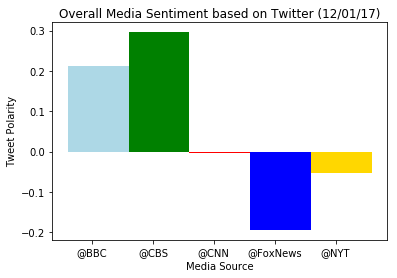

In [44]:
# Build a bar chart of overall (mean) compound sentiment of the last 100 tweets for each news org

# Set x axis and tick locations
x_axis = np.arange(sentiments_pd["News Org"].nunique())
tick_locations = [value+0.4 for value in x_axis]

# Set title and axis labels
plt.title(f'Overall Media Sentiment based on Twitter ({now})')
plt.xlabel("Media Source")
plt.ylabel("Tweet Polarity")

# Create bar chart
plt.bar(x_axis, sentiments_pd.groupby("News Org").mean()["Compound"], color=orgs_colors_dict.values(), align="edge", width=1)
plt.xticks(tick_locations, sentiments_pd["News Org"].unique())

# Save graph as .png image and display
plt.savefig("bar_sentiment.png")
plt.show()